In [25]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.models import  Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [14]:
imgs_path = "Dataset/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    print(img_path)
    for img in os.listdir(img_path):
        im = Image.open("Dataset/Train/"+str(i)+"/"+img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

Dataset/Train/0
Dataset/Train/1
Dataset/Train/2
Dataset/Train/3
Dataset/Train/4
Dataset/Train/5
Dataset/Train/6
Dataset/Train/7
Dataset/Train/8
Dataset/Train/9
Dataset/Train/10
Dataset/Train/11
Dataset/Train/12
Dataset/Train/13
Dataset/Train/14
Dataset/Train/15
Dataset/Train/16
Dataset/Train/17
Dataset/Train/18
Dataset/Train/19
Dataset/Train/20
Dataset/Train/21
Dataset/Train/22
Dataset/Train/23
Dataset/Train/24
Dataset/Train/25
Dataset/Train/26
Dataset/Train/27
Dataset/Train/28
Dataset/Train/29
Dataset/Train/30
Dataset/Train/31
Dataset/Train/32
Dataset/Train/33
Dataset/Train/34
Dataset/Train/35
Dataset/Train/36
Dataset/Train/37
Dataset/Train/38
Dataset/Train/39
Dataset/Train/40
Dataset/Train/41
Dataset/Train/42
success


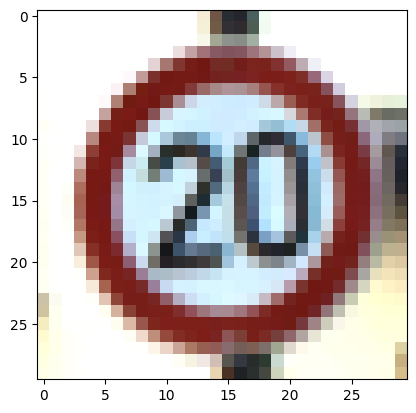

In [23]:
path = "Dataset/Train/0/00000_00004_00024.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [24]:
#Split Dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [26]:
#Build a CNN model

model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

2023-12-11 15:11:54.256768: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-11 15:11:54.256847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harsh424): /proc/driver/nvidia/version does not exist
2023-12-11 15:11:54.258786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [28]:
#Train and Validate the Model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15


2023-12-11 15:12:35.941973: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 84690900 exceeds 10% of free system memory.


  1/491 [..............................] - ETA: 13:24 - loss: 55.1864 - accuracy: 0.0312

2023-12-11 15:12:37.636684: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29427200 exceeds 10% of free system memory.
2023-12-11 15:12:37.636997: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29427200 exceeds 10% of free system memory.
2023-12-11 15:12:37.726717: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 21496800 exceeds 10% of free system memory.


  2/491 [..............................] - ETA: 1:48 - loss: 38.6617 - accuracy: 0.0391 

2023-12-11 15:12:37.847413: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29427200 exceeds 10% of free system memory.


491/491 [==============================] - 96s 192ms/step - loss: 2.2863 - accuracy: 0.4458 - val_loss: 0.5615 - val_accuracy: 0.8729
Epoch 2/15
491/491 [==============================] - 90s 183ms/step - loss: 0.6915 - accuracy: 0.7987 - val_loss: 0.1833 - val_accuracy: 0.9591
Epoch 3/15
491/491 [==============================] - 104s 212ms/step - loss: 0.4212 - accuracy: 0.8754 - val_loss: 0.1278 - val_accuracy: 0.9648
Epoch 4/15
491/491 [==============================] - 125s 255ms/step - loss: 0.2995 - accuracy: 0.9133 - val_loss: 0.0832 - val_accuracy: 0.9783
Epoch 5/15
491/491 [==============================] - 123s 252ms/step - loss: 0.2488 - accuracy: 0.9279 - val_loss: 0.0670 - val_accuracy: 0.9802
Epoch 6/15
491/491 [==============================] - 140s 286ms/step - loss: 0.2213 - accuracy: 0.9365 - val_loss: 0.0571 - val_accuracy: 0.9847
Epoch 7/15
491/491 [==============================] - 128s 261ms/step - loss: 0.1876 - accuracy: 0.9464 - val_loss: 0.0552 - val_accuracy

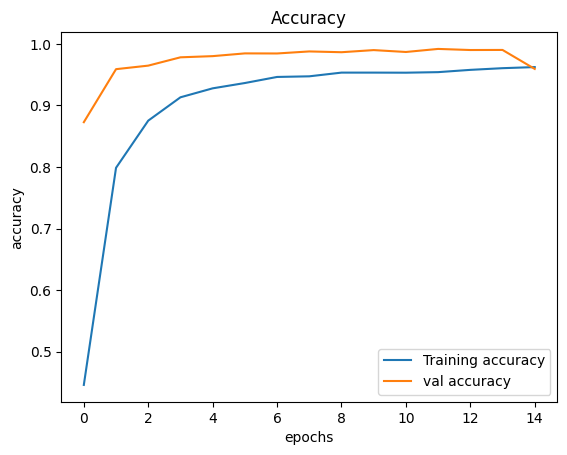

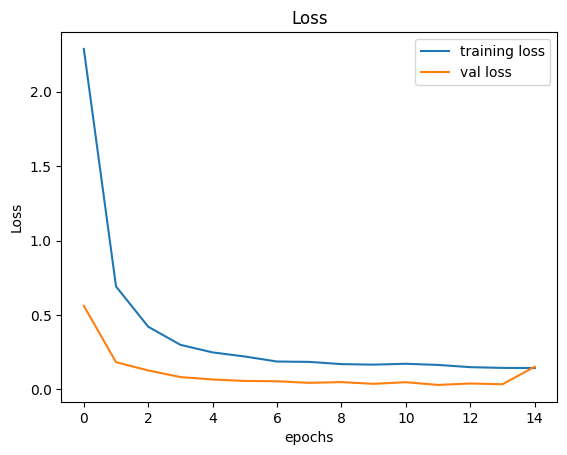

In [29]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [39]:
#Test The Model
from sklearn.metrics import accuracy_score
test = pd.read_csv("Dataset/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "Dataset/"
test_imgs = test['Path'].values
test_data = []
test_labels = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = np.argmax(model.predict(x_test),axis=1)
print(predictions)

246/246 [==============================] - 3s 12ms/step
[26 15 13 ...  8  7 20]


In [36]:
#Save the model
model.save('traffic_classifier.h5')